In [36]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: ___

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [80]:
def derivada(f,x, tol = 1e-8):
  '''
  La función derivada arroja utiliza el método de diferencis finitas centrales

  Recibe: x(float): constante
          f(función): callable
          tol(float): constante
  Retorna: valor de la derivada en el avlor de x dado(float)
          h_valores(array): Valores usados para derivada
  '''

  h_valores = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
  derivada_anterior = 0
  f_prime_h = 0
  valor_derivada = []
  for h in h_valores:
    f_prime_h = (f(x + h) - f(x - h))/(2 * h)
    valor_derivada.append(f_prime_h)
    if abs(f_prime_h - derivada_anterior) < tol:
          break
    else:
      derivada_anterior = f_prime_h
  return valor_derivada, h_valores


In [81]:
f = lambda x: 3**x
derivada_eval, h_valores = derivada(f, 2)
for n in range(6):
  print(f'En h = {h_valores[n]} el valor de la derivada es {derivada_eval[n]}')

En h = 0.1 el valor de la derivada es 9.90741213869141
En h = 0.01 el valor de la derivada es 9.887709494557217
En h = 0.001 el valor de la derivada es 9.887512586965741
En h = 0.0001 el valor de la derivada es 9.887510617909712
En h = 1e-05 el valor de la derivada es 9.887510598272087
En h = 1e-06 el valor de la derivada es 9.887510598716176


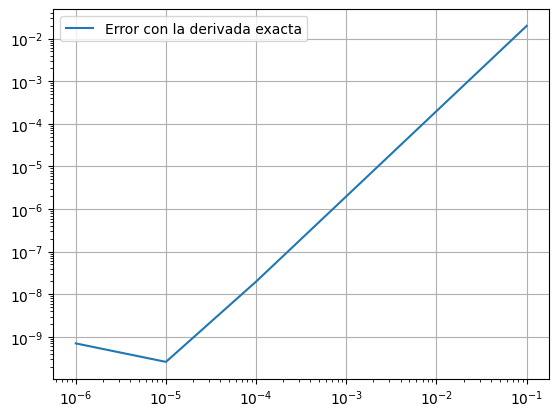

In [84]:
df_exacta = 3**2 * np.log(3)

Error = np.array(derivada_eval) - df_exacta
plt.loglog(h_valores, Error, label = 'Error con la derivada exacta')
plt.grid()
plt.legend()

In [37]:
3**2 * np.log

np.float64(9.887510598012987)

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [89]:
#Datos
r = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] #cm
v_r = [2.00, 1.92, 1.68, 1.28, 0.72, 0.00] #cm/s

r_interp = np.linspace(min(r), max(r), 100)

#CubicSpline
Pol_CS = CubicSpline(r, v_r)
Pol_interp_CS = Pol_CS(r_interp)

#Lagrange
Pol_lag = lagrange(r, v_r)
Pol_interp_lag = Pol_lag(r_interp)

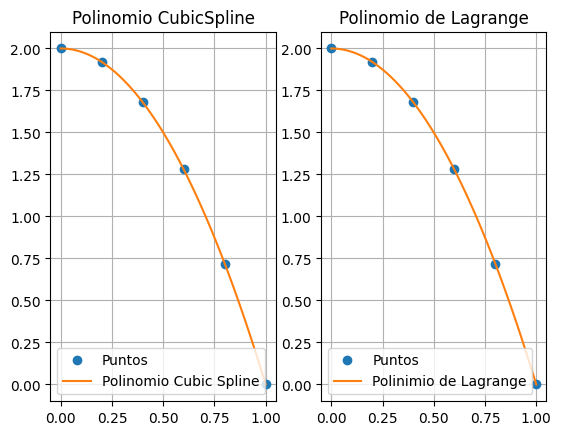

In [97]:
#Gráfica
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Polinomio CubicSpline')
plt.plot(r, v_r, 'o', label = 'Puntos')
plt.plot(r_interp, Pol_interp_CS, label = 'Polinomio Cubic Spline')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Polinomio de Lagrange')
plt.plot(r, v_r, 'o', label = 'Puntos')
plt.plot(r_interp, Pol_interp_lag, label = 'Polinimio de Lagrange')
plt.grid()
plt.legend()

In [108]:
#Derivada con gradient
h = 1e-4
r_interp_2 = np.arange(min(r), max(r) + h, h)
df_grad = np.gradient(Pol_CS(r_interp_2), r_interp_2)

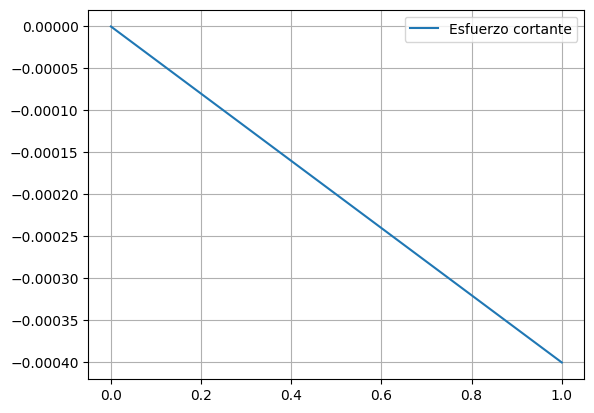

In [116]:
mu = 0.0001 #Pa * s
Esfuerzo_cortante = lambda r: mu * df_grad
y = Esfuerzo_cortante(r_interp_2)
plt.plot(r_interp_2, y, label = 'Esfuerzo cortante')
plt.grid()
plt.legend()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [136]:
#quad
Integrando = lambda z, y, x: x * y * z #kg/m³
def Integral_interna(y, x):
  Integrando = lambda z: x * y * z
  Integral = quad(Integrando, 0, 1 - x - y)[0]
  return Integral

def Integral_externa(x):
  Integrando = lambda y: Integral_interna(y, x)
  Integral = quad(Integrando, 0, 1 - x)[0]
  return Integral

a, b = 0, 1
Integral = quad(Integral_externa, a, b)
print(f'La masa total del solido es {Integral[0]:.4f} kg')

#tplquad
Integrando = lambda z, y, x: x * y * z
a, b = 0, 1
c, d = lambda x: 0, lambda x: 1 - x
e, f = lambda x, y: 0, lambda x, y: 1 - x - y
Integral_tpl = tplquad(Integrando, a, b, c, d, e, f)
print(f'Con triple quad, el valor de la masa es {Integral_tpl[0]:.4f} kg')

La masa total del solido es 0.0014 kg
Con triple quad, el valor de la masa es 0.0014 kg


In [ ]:
a, b = lambda x: 0, lambda x: 1
c, d = lambda x: 0, lambda x: 1 - x
e, f = lambda y, x: 0, lambda y, x: 1 - x - y
Integral_tpl = tplquad(Integrando, a, b, c, d, e, f)